# Preliminary operations

In [ ]:
import os 

# SET HERE YOUR ROOTPATH
rootpath = 'C:\\Users\\chiar\\OneDrive\\Desktop\\XrAI'

# Set the working directory
os.chdir(rootpath) 

In [4]:
#@title Main libraries
import pandas as pd
import numpy as np

import os
import random

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [5]:
#@title Reproducibility
# Setting a seed for reproducibility
seed = 90 
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print("The seed is: " + str(seed))

The seed is: 90


# Images exploration

In [13]:
#@title Image size
import imageio as iio
import random

dir = 'test_merged/all'
filelist = os.listdir(dir) 
random.shuffle(filelist)

for i, filename in enumerate(filelist):
  if i>20: break
  img = iio.imread(os.path.join(dir, filename))
  print(i, ": ", img.shape)

0 :  (400, 400)
1 :  (400, 400)
2 :  (1198, 1198)
3 :  (400, 400)
4 :  (400, 400)
5 :  (400, 400)
6 :  (1672, 1672)
7 :  (1064, 1064)
8 :  (1312, 1312)
9 :  (400, 400)
10 :  (2464, 2464)
11 :  (400, 400)
12 :  (2028, 2028)
13 :  (2987, 2987)
14 :  (992, 992)
15 :  (4020, 4020)
16 :  (1460, 1460)
17 :  (400, 400)
18 :  (1064, 1064)
19 :  (1392, 1392)
20 :  (992, 992)


In [6]:
#@title Access data
gen = ImageDataGenerator(rescale = 1/255.).flow_from_directory(directory = 'splitted_dataset/test',
                                              class_mode = 'categorical',
                                              batch_size = 64,
                                              shuffle = True)
gen.class_indices

Found 3093 images belonging to 3 classes.


{'normal': 0, 'pneumonia': 1, 'tubercolosis': 2}

In [ ]:
#@title Visualize images 

def visualize_images(batch):
  # generator.next() provides [images, labels] (with dimension batch_size)

  images = batch[0]
  labels = np.argmax(batch[1], axis=-1)

  size,scale = 1000, 10
  c=5
    
  for i in range(3):
    f, axs = plt.subplots(1,c, figsize=(20,20))
    axs.flat
    xs = images[labels==i]
    for j in range(c):
      img = xs[j]
      axs[j].imshow(img)
      axs[j].set_title(list(gen.class_indices.items())[i][0])

In [ ]:
nextbatch = gen.next()

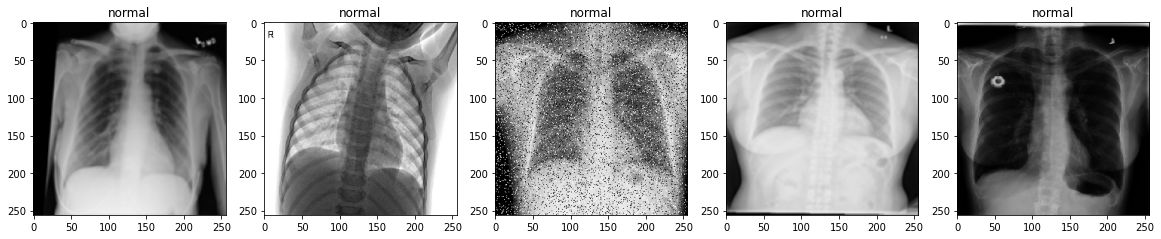

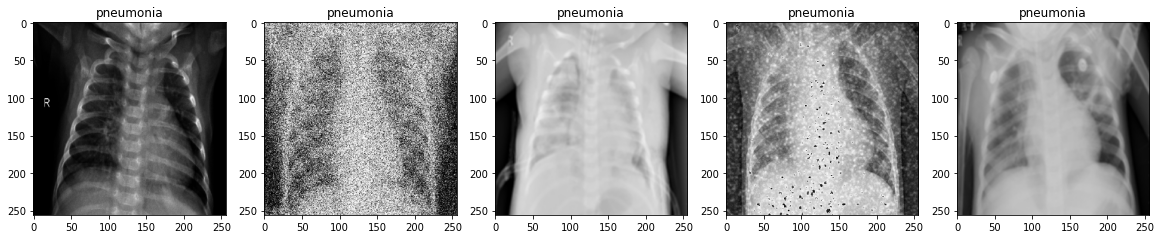

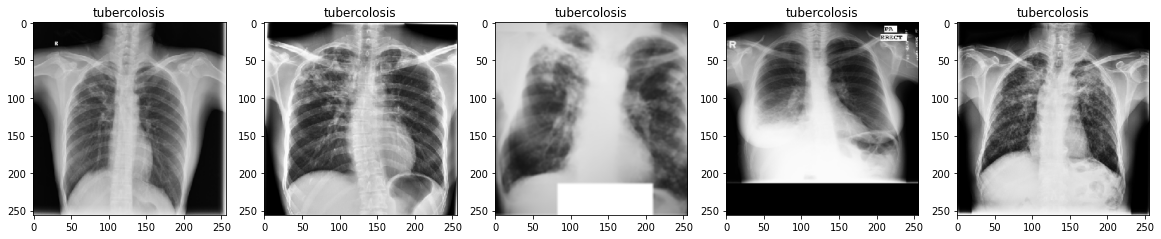

In [ ]:
visualize_images(nextbatch)

# Target distribution 

In [ ]:
dataset_dir = '/content/gdrive/MyDrive/Assignment/OriginalDataset/splitted_dataset'
training_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')
training_set = ImageDataGenerator().flow_from_directory(directory = training_dir)
validation_set = ImageDataGenerator().flow_from_directory(directory = validation_dir)
test_set = ImageDataGenerator().flow_from_directory(directory = test_dir)

Found 11124 images belonging to 3 classes.
Found 1253 images belonging to 3 classes.
Found 3093 images belonging to 3 classes.


In [ ]:
from collections import Counter
tot = 11124 +1253 +3093 
tot_train = 11124
tot_val = 1253 
tot_test = 3093

counter_train = Counter(training_set.classes)
counter_val = Counter(validation_set.classes)
counter_test = Counter(test_set.classes)
print('Train')
print(counter_train.items())
print(tot_train/tot*100)
print('Validation')
print(counter_val.items())
print(tot_val/tot*100)
print('Test')
print(counter_test.items())
print(tot_test/tot*100)

print('train N/P/T:', np.array([6730, 3051, 1343])/tot_train*100)
print('val N/P/T:', np.array([741, 360, 152])/tot_val*100)
print('test N/P/T:', np.array([1883, 839, 371])/tot_test*100)

Train
dict_items([(0, 6730), (1, 3051), (2, 1343)])
71.90691661279897
Validation
dict_items([(0, 741), (1, 360), (2, 152)])
8.099547511312217
Test
dict_items([(0, 1883), (1, 839), (2, 371)])
19.993535875888817
train N/P/T: [60.49982021 27.42718447 12.07299533]
val N/P/T: [59.13806864 28.73104549 12.13088587]
test N/P/T: [60.87940511 27.12576786 11.99482703]


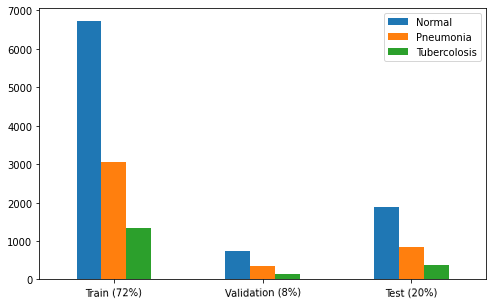

In [ ]:
dat = pd.DataFrame({"Normal":[6730, 741, 1883],
             "Pneumonia":[3051, 360, 839],
             "Tubercolosis":[1343, 152, 371]}, 
             index = ["Train (72%)", "Validation (8%)", "Test (20%)"])
dat.plot(kind="bar", figsize=(8, 5), rot=1, fontsize=10)